In [ ]:
pip install qiskit

In [ ]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

In [ ]:
def oracle_function(n: int, f: str):
    oracle_qc = QuantumCircuit(n+1)
    
    #Balanced Case
    if f == "balanced":
        #Wrapinng with X-gates:
        b = np.random.randint(1,2**n)

        #Converting in string
        b_str = format(b, '0'+str(n)+'b')
        
        #If qubit is 1 -> X gate
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        
        #C-NOT gates
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        #Final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    #Constant case
    if f == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)

        #X gate if output is 1
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    
    #Setting output bit:
    dj_circuit.x(n)
    dj_circuit.h(n)

    #Applying Hadamard gates
    for qubit in range(n):
        dj_circuit.h(qubit)

    # Oracle gate to the circuit:
    dj_circuit.append(oracle, range(n+1))

    # Finally, the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [ ]:
n = 4
oracle_gate = oracle_function(n, 'balanced')
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

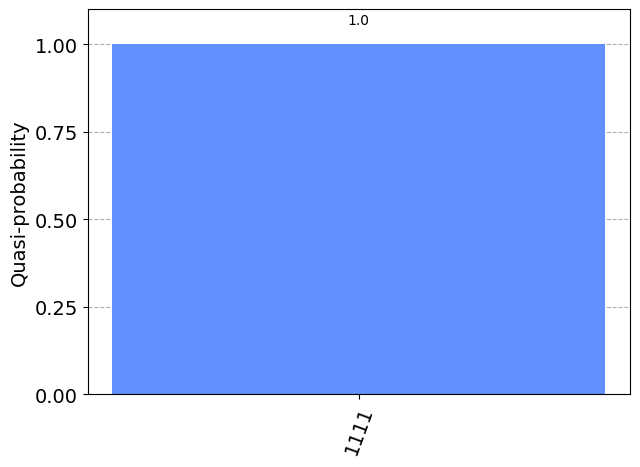

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
total = sum([i for i in answer.values()])

for input,value in answer.items():
  answer[input] = value/total

plot_histogram(answer)